In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X_temp = iris.data
y_temp = iris.target


In [4]:
X,y= X_temp[:,[0,1]],y_temp

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [26]:
from sklearn import preprocessing

In [27]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

Text(0, 0.5, 'sepal width')

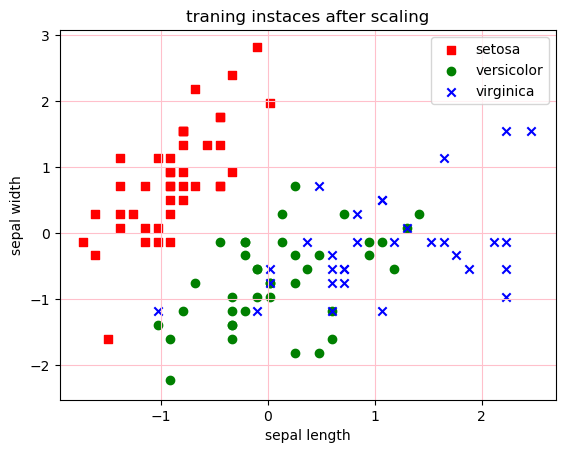

In [58]:
import numpy as np
colors = [['red','s'],['green','o'],['blue','x']]
import matplotlib.pyplot as plt

for i in range(len(colors)):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,c = colors[i][0],marker = colors[i][1])

plt.rcParams['axes.facecolor']='white'
plt.style.use('default')
plt.grid(c='pink')
plt.title('traning instaces after scaling')
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#x = np.linspace(-2, 1, 6)
#y = np.linspace(-2, 1, 6)
#plt.plot(x, y , 21.76*x-10.51*y-13.90, linestyle='--')  
#dashed


In [31]:
import copy
y_train_setosa = copy.copy(y_train)
y_train_setosa[y_train_setosa>0]=1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa>0]=1
print(y_train_setosa)

[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


In [37]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log',random_state=42)


In [47]:
clf.fit(X_train,y_train_setosa)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [48]:
print(clf.coef_,clf.intercept_)

[[ 21.76180378 -10.51985219]] [13.90763026]


In [49]:
print(iris.target_names[clf.predict(scaler.transform([[4.6,3.2]]))])

['setosa']


In [50]:
print(iris.target_names[clf.predict(scaler.transform([[6.9,3.1]]))])

['versicolor']


In [51]:
print(iris.target_names[clf.predict(scaler.transform([[6,3]]))])

['versicolor']


In [52]:
clf.predict(scaler.transform([[6,3]]))

array([1])

In [53]:
clf.predict(scaler.transform([[4.6,3.2]]))

array([0])

In [54]:
if clf.predict(scaler.transform([[4.6,3.2]]))==0:
    print("setosa")
else:
    print("not setosa")

setosa
